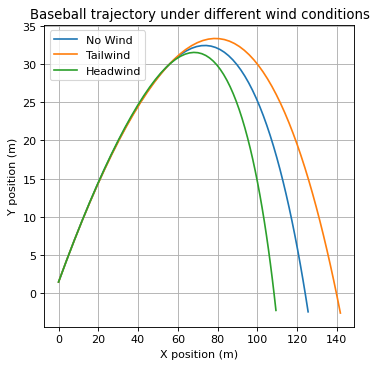

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#constants and conditions
initial_velocity = 49.1744 #m/s, book has 110mph
velocity_angle = 35 * np.pi / 180 #coverted to radians because numpy only likes radians
gravity = 9.8 #m/s^2
dt=0.1
windspeed = 4.4704 #m/s book has 10mph

#calculating the initial vector components
position = []
velocity = []
position.append([0,1.5])
position_headwind = position.copy()
position_tailwind = position.copy()
velocity.append([initial_velocity * np.cos(velocity_angle), initial_velocity * np.sin(velocity_angle)])
velocity_headwind = velocity.copy()
velocity_tailwind = velocity.copy()

def norm (vector):
    return (vector[0]**2 + vector[1]**2)**0.5

def calculate_drag_value(velocity):
    #This is B/m value given by the book
    b_over_m = 0.0039 + 0.0058/(1+np.exp(velocity - 35)/5)
    return b_over_m

def calculate_next_velocity(velocity, windspeed):
    #velocity[0] is x-comp of velocity
    #velocity[1] is y-comp
    #...
    dragged_velocity = norm([velocity[0] - windspeed, velocity[1]])
    newx = velocity[0] - calculate_drag_value(norm(velocity)) * dragged_velocity * (velocity[0] - windspeed) * dt
    newy = velocity[1] - calculate_drag_value(norm(velocity)) * dragged_velocity * velocity[1] * dt - gravity * dt
    return [newx, newy]

def calculate_next_position(position, velocity):
    newx = position[0] + velocity[0] * dt
    newy = position[1] + velocity[1] * dt
    return [newx, newy]

i=0 #this is the python way to do a do-while loop
#e.g. stop the loop if y<=0, physically meaning the ball hit the ground
while True:
    velocity.append(calculate_next_velocity(velocity[i], 0))
    position.append(calculate_next_position(position[i], velocity[i]))
    if(position[i][1]<=0): break
    i=i+1

#now do the same for headwind and tailwind conditions
i=0
while True:
    velocity_headwind.append(calculate_next_velocity(velocity_headwind[i], -windspeed))
    position_headwind.append(calculate_next_position(position_headwind[i], velocity_headwind[i]))
    if(position_headwind[i][1]<=0): break
    i=i+1

i=0
while True:
    velocity_tailwind.append(calculate_next_velocity(velocity_tailwind[i], windspeed))
    position_tailwind.append(calculate_next_position(position_tailwind[i], velocity_tailwind[i]))
    if(position_tailwind[i][1]<=0): break
    i=i+1

#visualization
figure = plt.figure(figsize=(5, 5), dpi=80)
#rearranges my list of vectors into two separate lists of x,y
#e.g. v=[[1,2],[3,4]] becomes x = [1,3] y = [2,4]
x,y = zip(*position)
x_tail, y_tail = zip(*position_tailwind)
x_head, y_head = zip(*position_headwind)

plt.plot(x, y, label="No Wind")
plt.plot(x_tail, y_tail, label="Tailwind")
plt.plot(x_head, y_head, label="Headwind")

plt.legend(loc="best")
plt.title("Baseball trajectory under different wind conditions")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.grid(True)
plt.show()